# Statistical problems: Worksheet

#### - Created by: Nirmit Patel
#### - Last edited by: Nirmit Patel
#### - Last edited on: 04/03/23

----------------------------------
### In this notebook we solve the following statistical problems:

- If you rolled 2 dice 100 times and added the numbers, how many times would you get 8?
- What is the probability that AAPL will drop 5% or more in a day?
- What is the probability that AAPL will drop 20% or more in a year?
- What is the estimated daily log stock return of AAPL with confidence interval 90%?

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

### Q) If you rolled 2 dice 100 times and added the numbers, how many times would you get 8?

In [47]:
# First, lets simulate a single dice roll
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice)  

Sum of dice is 9


<AxesSubplot:>

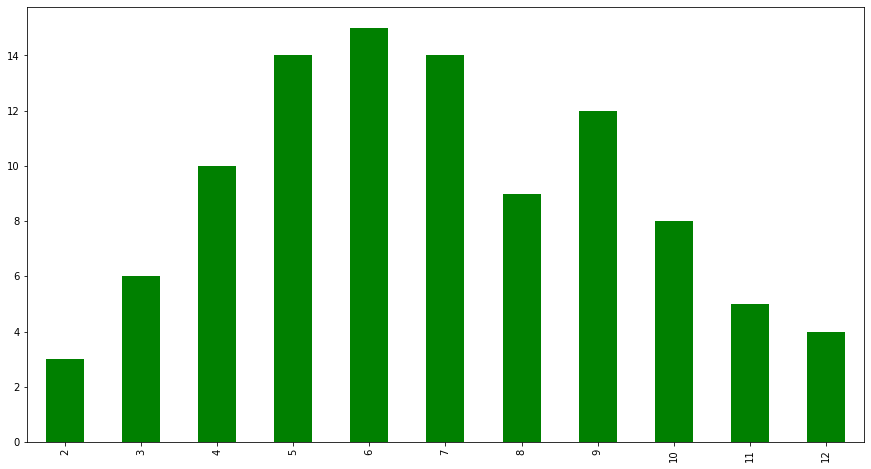

In [48]:
# Now we want to roll the dice 100 times and store the results. Then plot the results
trial = 100
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
results_df = pd.DataFrame(results)[0]
results_df.value_counts().sort_index().plot(kind = 'bar', color = 'green', figsize=(15, 8))

Notes: 
- Seems like the distribution is normally distributed

### Q) What is the probability that AAPL will drop 5% or more in a day?

In [49]:
aapl = pd.read_csv('/Users/nirmit/Documents/GitHub/R2Q/Trading Strategies/EMA Crossover/data/AAPL.csv')

In [50]:
aapl.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-26,44.087502,44.847500,44.052502,44.742500,42.653973,152648800
1,2018-02-27,44.775002,45.119999,44.540001,44.597500,42.515739,155712400
2,2018-02-28,44.814999,45.154999,44.512501,44.529999,42.451382,151128400


In [51]:
# First lets calculate the daily log returns 
aapl['LogReturns'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])

In [52]:
# Now, we find the mean and std of the log returns
mu = aapl['LogReturns'].mean()
sigma = aapl['LogReturns'].std(ddof = 1)

proba_drop = norm.cdf(-0.05, mu, sigma)
print('Probability of AAPL dropping more than 5% in a single trading day is: ', proba_drop)

Probability of AAPL dropping more than 5% in a single trading day is:  0.007865956718508095


### Q) What is the probability that AAPL will drop 20% or more in a year?

In [53]:
mu_year = mu*250 
sigma_year = (250**0.5) * sigma

proba_drop_year = norm.cdf(-0.2, mu_year, sigma_year)
print('Probability of AAPL dropping more than 20% in a year is: ', proba_drop_year)

Probability of AAPL dropping more than 20% in a year is:  0.09556788440071795


### Q) What is the estimated daily stock return of AAPL with confidence interval 90%?

In [59]:
sample_size = aapl['LogReturns'].shape[0]
sample_mean = aapl['LogReturns'].mean()
sample_std = aapl['LogReturns'].std(ddof=1) / sample_size**0.5

z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-3.387374639427529e-05, 0.001921845231219872)


Note: 
- This means that we can be 90% confident that the true value of the daily log return of AAPL is between (-3.387374639427529e-05, 0.001921845231219872)